In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon_delivery.csv")

In [3]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [6]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


## Step 2: Handle Missing Values

#### Agent_Rating → few missing

#### Weather → some missing

In [7]:
df["Agent_Rating"].fillna(df["Agent_Rating"].mean() , inplace = True)
df["Weather"].fillna(df["Weather"].mode()[0] , inplace= True)

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_3400\1987526852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Agent_Rating"].fillna(df["Agent_Rating"].mean() , inplace = True)
C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_3400\1987526852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [8]:
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Convert Date Column

In [10]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

### Extract Useful Features

In [11]:
df["day"] = df["Order_Date"].dt.day
df["month"] = df["Order_Date"].dt.month
df["weekday"] = df["Order_Date"].dt.weekday

In [12]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,day,month,weekday
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,19,3,5
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,25,3,4
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,19,3,5
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,5,4,1
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,26,3,5


### Create Distance Feature

In [13]:
from geopy.distance import geodesic

In [14]:
def calculate_distance(row):
    store = (row["Store_Latitude"] , row["Store_Longitude"])
    drop = (row["Drop_Latitude"] , row["Drop_Longitude"])
    return geodesic(store , drop).km

In [15]:
df["distance"] = df.apply(calculate_distance , axis =1)

In [16]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,day,month,weekday,distance
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,19,3,5,3.020737
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,25,3,4,20.143737
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,19,3,5,1.549693
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,5,4,1,7.774497
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,26,3,5,6.197898


### Drop Unnecessary Columns

In [17]:
df.drop(['Order_ID','Order_Date','Order_Time','Pickup_Time'], axis=1, inplace=True)

In [18]:
df.shape

(43739, 16)

### Check Unique Values

In [19]:
print(df['Weather'].unique())
print(df['Traffic'].unique())
print(df['Vehicle'].unique())
print(df['Area'].unique())
print(df['Category'].unique())

['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
['motorcycle ' 'scooter ' 'van' 'bicycle ']
['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']
['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']


#### Remove Spaces

In [20]:
cols = ['Weather','Traffic','Vehicle','Area','Category']

for col in cols:
    df[col] = df[col].str.strip()

### Convert to Lowercase

In [21]:
for col in cols:
    df[col] = df[col].str.lower()

### Fix Traffic "NaN" Values

In [22]:
df['Traffic'].replace('nan', np.nan, inplace=True)

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_3400\1009247801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic'].replace('nan', np.nan, inplace=True)


In [23]:
df['Traffic'].fillna(df['Traffic'].mode()[0], inplace=True)

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_3400\190772987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic'].fillna(df['Traffic'].mode()[0], inplace=True)


### Fix Spelling Mistakes

In [24]:
df['Area'].replace({
    'metropolitian': 'metropolitan'
}, inplace=True)

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_3400\2792715298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area'].replace({


### Merge Same Categories

In [25]:
df['Category'].replace({
    'apparel': 'clothing'
}, inplace=True)

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_3400\4259900065.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].replace({


In [26]:
print(df['Weather'].unique())
print(df['Traffic'].unique())
print(df['Vehicle'].unique())
print(df['Area'].unique())
print(df['Category'].unique())

['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy']
['high' 'jam' 'low' 'medium']
['motorcycle' 'scooter' 'van' 'bicycle']
['urban' 'metropolitan' 'semi-urban' 'other']
['clothing' 'electronics' 'sports' 'cosmetics' 'toys' 'snacks' 'shoes'
 'jewelry' 'outdoors' 'grocery' 'books' 'kitchen' 'home' 'pet supplies'
 'skincare']


## Exploratory Data Analysis (EDA)

### Delivery Time Distribution

### This shows whether delivery times are mostly short or long.

C:\anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


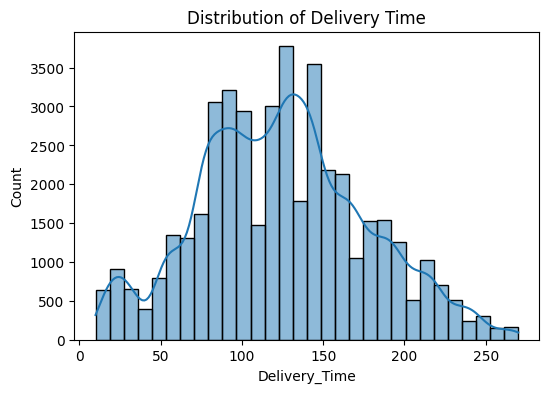

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df["Delivery_Time"] , bins = 30 , kde = True)
plt.title("Distribution of Delivery Time")
plt.show()

<Axes: >

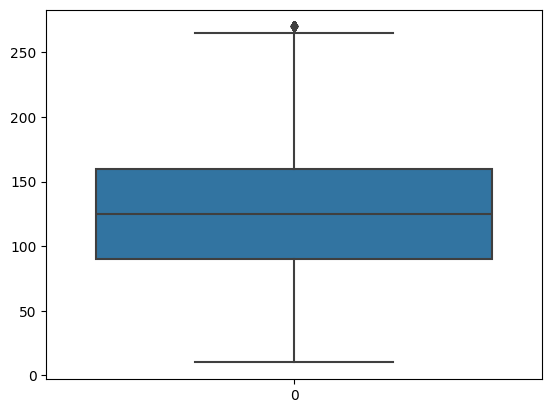

In [28]:
sns.boxplot(df['Delivery_Time'])

In [29]:
q1 = df['Delivery_Time'].quantile(0.25)
q3 = df['Delivery_Time'].quantile(0.75)
iqr = q3 - q1

df = df[
    (df['Delivery_Time'] >= q1 - 1.5*iqr) &
    (df['Delivery_Time'] <= q3 + 1.5*iqr)
]

### Delivery time is roughly normally distributed

### Most deliveries fall between 90–160 minutes

### Few deliveries take very long (outliers)

### Traffic vs Delivery Time

### This shows how traffic impacts delivery.

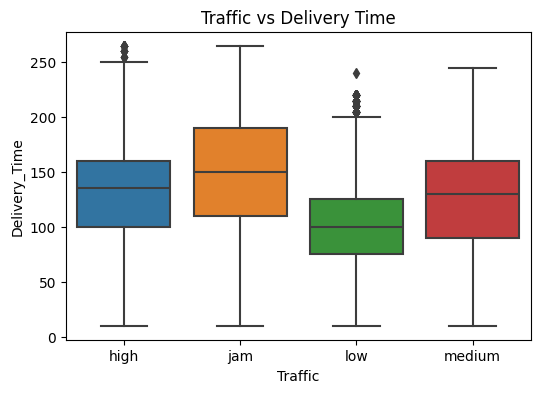

In [30]:
plt.figure(figsize = (6,4))
sns.boxplot(x='Traffic' , y='Delivery_Time', data=df)
plt.title("Traffic vs Delivery Time")
plt.show()

#### Jam traffic → highest delivery time

#### Low traffic → lowest delivery time

#### Medium and high traffic are in between

### Weather vs Delivery Time

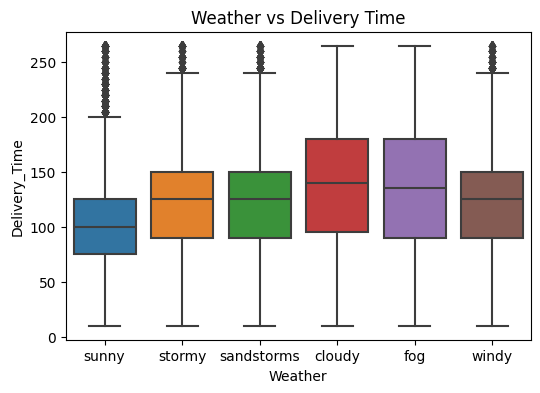

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Weather', y='Delivery_Time', data=df)
plt.title("Weather vs Delivery Time")
plt.show()

#### Cloudy, fog, stormy → higher median delivery time

#### Sunny → comparatively lower delivery time

### Distance vs Delivery Time

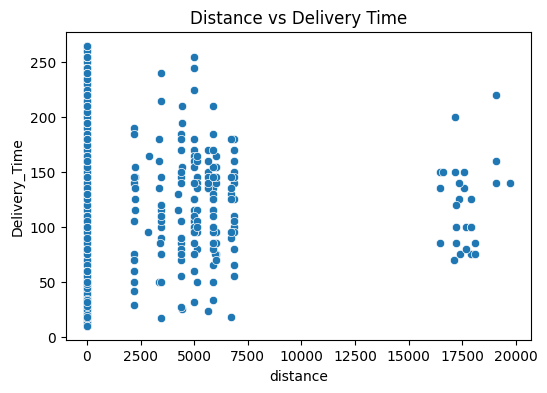

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='distance', y='Delivery_Time', data=df)
plt.title("Distance vs Delivery Time")
plt.show()

#### Delivery time generally increases with distance

#### Some vertical clustering (normal because many deliveries share similar distances)

### Agent Rating vs Delivery Time

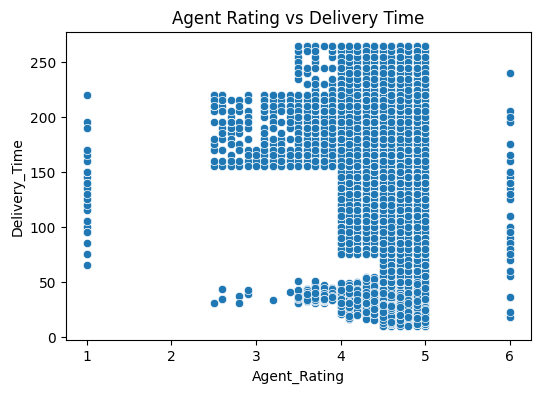

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df)
plt.title("Agent Rating vs Delivery Time")
plt.show()

#### Slight trend: higher ratings → slightly lower delivery time

#### But effect is weaker than traffic or distance

### Category vs Delivery Tim

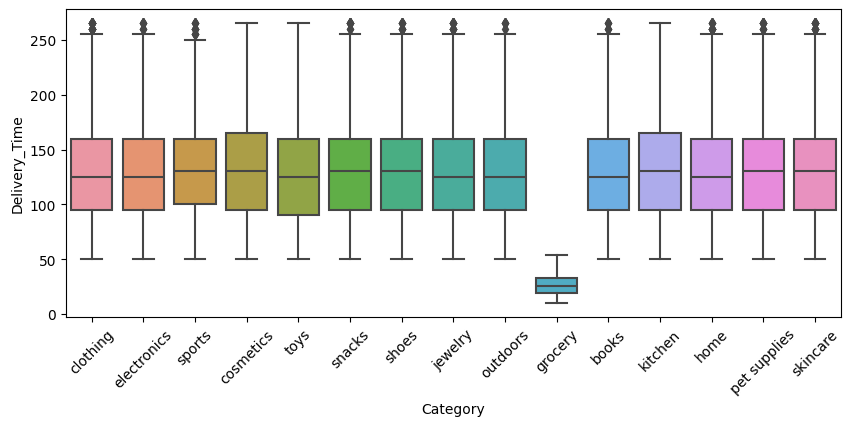

In [34]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Category', y='Delivery_Time', data=df)
plt.xticks(rotation=45)
plt.show()

#### Grocery deliveries are much faster

#### Other categories have similar delivery times

### Correlation Heatmap

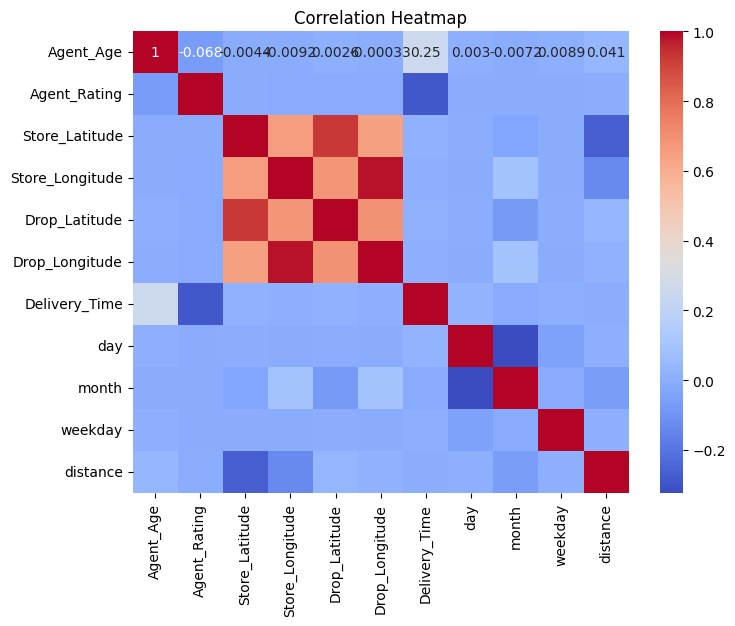

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Distance has a positive correlation with delivery time

#### Agent rating has a slight negative correlation

#### Latitude/Longitude highly correlated (expected)

### Encode Categorical Variables

In [36]:
df = pd.get_dummies(df, drop_first=True)

In [37]:
df.head()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,day,month,weekday,...,Category_home,Category_jewelry,Category_kitchen,Category_outdoors,Category_pet supplies,Category_shoes,Category_skincare,Category_snacks,Category_sports,Category_toys
0,37,4.9,22.745049,75.892471,22.765049,75.912471,120,19,3,5,...,False,False,False,False,False,False,False,False,False,False
1,34,4.5,12.913041,77.683237,13.043041,77.813237,165,25,3,4,...,False,False,False,False,False,False,False,False,False,False
2,23,4.4,12.914264,77.678400,12.924264,77.688400,130,19,3,5,...,False,False,False,False,False,False,False,False,True,False
3,38,4.7,11.003669,76.976494,11.053669,77.026494,105,5,4,1,...,False,False,False,False,False,False,False,False,False,False
4,32,4.6,12.972793,80.249982,13.012793,80.289982,150,26,3,5,...,False,False,False,False,False,False,False,False,False,True


## Regression Model Development:

In [38]:
from sklearn.model_selection import train_test_split

x = df.drop("Delivery_Time", axis=1)
y = df["Delivery_Time"]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
def evalute_model(model, x_test , y_test):
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test , y_pred)
    rmse = np.sqrt(mean_squared_error(y_test , y_pred))
    r2 = r2_score(y_test , y_pred)
    return mae, rmse, r2

### Train Linear Regression

In [42]:
lr = LinearRegression()
lr.fit(x_train , y_train)

lr_mae , lr_rmse , lr_r2 = evalute_model(lr , x_test,y_test)

print("Linear Regression")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2:", lr_r2)

Linear Regression
MAE: 26.25155425245174
RMSE: 33.35508951512
R2: 0.5846177966626672


## Train Random Forest

In [43]:
rd = RandomForestRegressor(n_estimators=100, random_state=42)
rd.fit(x_train,y_train)

rd_mae , rd_rmse , rd_r2 = evalute_model(rd , x_test,y_test)

print("Linear Regression")
print("MAE:", rd_mae)
print("RMSE:", rd_rmse)
print("R2:", rd_r2)

Linear Regression
MAE: 17.617461062757673
RMSE: 22.842756766230575
R2: 0.8051857614593755


## Train Gradient Boosting

In [44]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

gb_mae , gb_rmse , gb_r2 = evalute_model(gb , x_test,y_test)

print("Linear Regression")
print("MAE:", gb_mae)
print("RMSE:", gb_rmse)
print("R2:", gb_r2)

Linear Regression
MAE: 19.582661850413448
RMSE: 25.145277023705958
R2: 0.7639323298649549


## Compare Models

In [45]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [lr_mae, rd_mae, gb_mae],
    "RMSE": [lr_rmse, rd_rmse, gb_rmse],
    "R2 Score": [lr_r2, rd_r2, gb_r2]
})

print(results)

               Model        MAE       RMSE  R2 Score
0  Linear Regression  26.251554  33.355090  0.584618
1      Random Forest  17.617461  22.842757  0.805186
2  Gradient Boosting  19.582662  25.145277  0.763932


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rd = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rd , param_grid , cv =3, scoring = 'r2', n_jobs=-1)

grid_search.fit(x_train , y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [47]:
best_rf = grid_search.best_estimator_

In [49]:
pred = best_rf.predict(x_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2:", r2_score(y_test, pred))

MAE: 17.50648210056546
RMSE: 22.64097865070853
R2: 0.8086122860339361


In [53]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

y1_pred = xgb.predict(x_test)

print("R2:", r2_score(y_test, y1_pred))
print("MAE:" , mean_absolute_error(y_test , y1_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test , y1_pred)))

R2: 0.8049821669135006
MAE: 17.99824415971203
RMSE: 22.854689790975105


In [54]:
import mlflow

with mlflow.start_run(run_name="Random Forest"):
    rd.fit(x_train, y_train)
    pred = rd.predict(x_test)
    
    mlflow.log_metric("MAE", mean_absolute_error(y_test, pred))
    mlflow.log_metric("RMSE", np.sqrt(mean_squared_error(y_test, pred)))
    mlflow.log_metric("R2", r2_score(y_test, pred))

2026/02/07 18:09:05 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/07 18:09:05 INFO mlflow.store.db.utils: Updating database tables
2026/02/07 18:09:05 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/07 18:09:05 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/07 18:09:05 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/02/07 18:09:05 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2026/02/07 18:09:05 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2026/02/07 18:09:05 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2026/02/07 18:09:05 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2026/02/07 18:09:05 INFO alembic.runtime.migration: Running 

In [57]:
import os

os.makedirs("models", exist_ok=True)

import pickle

pickle.dump(rd, open("models/delivery_model.pkl", "wb"))

In [58]:
os.listdir("models")

['delivery_model.pkl']

In [59]:
import mlflow

with mlflow.start_run():
    mlflow.log_metric("test_accuracy", 0.85)